## CS 2064: Thandie Anim-Offei

### Data Science Research questions
1. What makeup materials in Maybelline are the most expensive? Which are the cheapest?(API)
2. What are the differences in percentage of twitter conversations? (Webscarping)
3. In 2005, what are the difference in Virginia SAT scores between the highest and lowest income students? (Direct Download)

### Sources
- Mabelline products, http://makeup-api.herokuapp.com/api/v1/products.json?brand=maybelline
- Twitters Wikipedia, https://en.wikipedia.org/wiki/Twitter#Revenue_sources
- School scores, https://corgis-edu.github.io/corgis/python/school_scores/


In [20]:
'''Imports and Utility Functions'''
import time
import requests


In [21]:
'''Public API: Your findings'''
url = f"http://makeup-api.herokuapp.com/api/v1/products.json?brand=maybelline"
response = requests.get(url)
jsonData = response.json()
print(response.status_code)
print()


bronzer_count = 0
bPrice = 0
blush_count = 0
blPrice = 0
lip_liner_count = 0
llPrice = 0
foundation_count = 0
fPrice = 0
eyeshadow_count = 0
esPrice = 0
eyeliner_count = 0
elPrice = 0
nail_polish_count = 0
nPrice = 0
lipstick_count = 0
lsPrice = 0
mascara_count = 0
mPrice = 0

for i in range(0,54):
    if 'bronzer' == jsonData[i]['product_type']:
        bronzer_count += 1
        bPrice += float(jsonData[i]['price'])
    if 'blush' == jsonData[i]['product_type']:
        blush_count += 1
        blPrice += float(jsonData[i]['price'])
    if 'lip_liner' == jsonData[i]['product_type']:
        lip_liner_count += 1
        llPrice += float(jsonData[i]['price'])
    if 'foundation' == jsonData[i]['product_type']:
        foundation_count += 1
        fPrice += float(jsonData[i]['price'])
    if 'eyeshadow' == jsonData[i]['product_type']:
        eyeshadow_count += 1
        esPrice += float(jsonData[i]['price'])
    if 'eyeliner' == jsonData[i]['product_type']:
        eyeliner_count += 1
        elPrice += float(jsonData[i]['price'])
    if 'nail_polish' == jsonData[i]['product_type']:
        nail_polish_count += 1
        nPrice += float(jsonData[i]['price'])
    if 'lipstick' == jsonData[i]['product_type']:
        lipstick_count += 1
        lsPrice += float(jsonData[i]['price'])
    if 'mascara' == jsonData[i]['product_type']:
        mascara_count += 1
        mPrice += float(jsonData[i]['price'])

bAVG = round(bPrice/bronzer_count, 2)
blAVG = round(blPrice/blush_count, 2)
llAVG = round(llPrice/lip_liner_count, 2)
fAVG = round(fPrice/foundation_count, 2)
esAVG = round(esPrice/eyeshadow_count, 2)
elAVG = round(elPrice/eyeliner_count, 2)
nAVG = round(nPrice/nail_polish_count, 2)
lsAVG = round(lsPrice/lipstick_count, 2)
mAVG = round(mPrice/mascara_count, 2)

avg_list = [bAVG, blAVG, llAVG, fAVG, esAVG, elAVG, nAVG, lsAVG, mAVG]

expensive = max(avg_list)
cheap = min(avg_list)


if expensive == bAVG:
    print("The most expensive item is bronzer with an average price of " + str(bAVG))
if cheap == bAVG:
    print("The cheapest item is bronzer with an average price of " + str(bAVG))
if expensive == llAVG:
    print("The most expensive item is lip liner with an average price of " + str(llAVG))
if cheap == llAVG:
    print("The cheapest item is lip liner with an average price of " + str(llAVG))
if expensive == fAVG:
    print("The most expensive item is foundation with an average price of " + str(fAVG))
if cheap == fAVG:
    print("The cheapest item is foundation with an average price of " + str(fAVG))
if expensive == esAVG:
    print("The most expensive item is eyeshadow with an average price of " + str(esAVG))
if cheap == esAVG:
    print("The cheapest item is eyeshadow with an average price of " + str(esAVG))
if expensive == elAVG:
    print("The most expensive item is eyeliner with an average price of " + str(elAVG))
if cheap == elAVG:
    print("The cheapest item is eyeliner with an average price of " + str(elAVG))
if expensive == nAVG:
    print("The most expensive item is nail polish with an average price of " + str(nAVG))
if cheap == nAVG:
    print("The cheapest item is nail polish with an average price of " + str(nAVG))
if expensive == lsAVG:
    print("The most expensive item is lipstick with an average price of " + str(lsAVG))
if cheap == lsAVG:
    print("The cheapest item is lipstick with an average price of " + str(lsAVG))
if expensive == mAVG:
    print("The most expensive item is mascara with an average price of " + str(mAVG))
if cheap == mAVG:
    print("The cheapest item is mascara with an average price of " + str(mAVG))
    

200

The most expensive item is foundation with an average price of 14.08
The cheapest item is nail polish with an average price of 4.49


In [22]:
''' Web Scraping: your findings '''
from bs4 import BeautifulSoup

url = 'https://en.wikipedia.org/wiki/Twitter#Revenue_sources'
response = requests.get(url)
print(response.status_code)
soup = BeautifulSoup(response.content, 'html.parser')

print("From the website titled " + f"{soup.title=}")
print()

captions = soup.findAll("figcaption")

for caption in captions:
    caption_text = caption.get_text(strip=True)
    if "Content of tweets according to Pear Analytics in August 2009" in caption_text:
        print(caption_text)

200
From the website titled soup.title=<title>Twitter - Wikipedia</title>

Content of tweets according to Pear Analytics in August 2009News (3.6%)Spam (3.8%)Self-promotion (6%)Pointless babble (40%)Conversational (38%)Pass-along value (8.7%)


In [1]:
''' Direct Download: your findings '''
import school_scores
record = school_scores.get_record()

vCount = 0
low_math = 0
low_verbal = 0

high_math = 0
high_verbal = 0

for num in range(0, 577):
    if record[num]['State']['Name'] == 'Virginia':
        vCount += 1
        low_math += record[num]['Family Income']['Between 20-40k']['Math']
        low_verbal += record[num]['Family Income']['Between 20-40k']['Verbal']
    
        high_math += record[num]['Family Income']['More than 100k']['Math']
        high_verbal += record[num]['Family Income']['More than 100k']['Verbal']



low_math_avg = round(low_math/vCount)
low_verbal_avg = round(low_verbal/vCount)

high_math_avg = round(high_math/vCount)
high_verbal_avg = round(high_verbal/vCount)

math_difference = abs(high_math_avg - low_math_avg)
verbal_difference = abs(high_verbal_avg - low_verbal_avg)

low_total = low_math_avg + low_verbal_avg
high_total = high_math_avg + high_verbal_avg


print('The average SAT score for the lowest income bracket is ' +str(low_total))
print('The average SAT score for the highest income bracket is ' +str(high_total))
print()
print('The average math score for the lowest income bracket is ' + str(low_math_avg))
print('The average verbal score for the lowest income bracket is ' + str(low_verbal_avg))
print()
print('The average math score for the highest income bracket is ' + str(high_math_avg))
print('The average verbal score for the highest income bracket is ' + str(high_verbal_avg))
print()
if low_math_avg > high_math_avg:
    print('On average, the students from a lower family income scored higher by ' + str(math_difference) + ' points in the math portion of the SAT.')
else:
    print('On average, the students from a lower family income scored lower by ' + str(math_difference) + ' points in the math portion of the SAT.')
print()
if low_math_avg > high_math_avg:
    print('On average, the students from a lower family income scored higher by ' + str(verbal_difference) + ' points in the reading portion of the SAT.')
else:
    print('On average, the students from a lower family income scored lower by ' + str(verbal_difference) + ' points in the reading poriton of the SAT.')

ModuleNotFoundError: No module named 'school_scores'

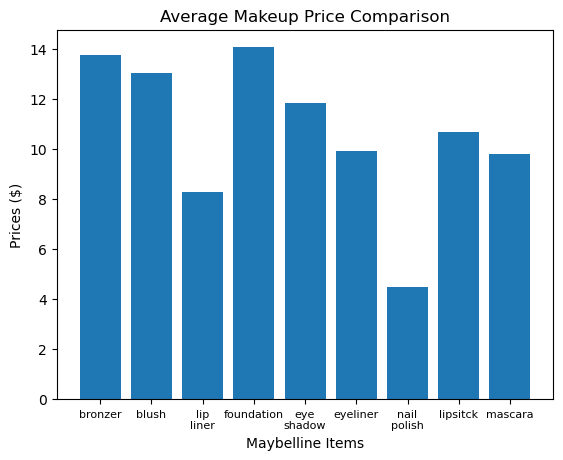

In [23]:
''' Visualization: '''
import matplotlib.pyplot as plt

items = ['bronzer', 'blush', 'lip\nliner', 'foundation', 'eye\nshadow', 'eyeliner', 'nail\npolish', 'lipsitck', 'mascara']
#values is avg_list

plt.bar(items, avg_list)
plt.xlabel("Maybelline Items", fontsize=10)
plt.ylabel("Prices ($)", fontsize=10)
plt.title("Average Makeup Price Comparison")
plt.tick_params(axis='x', labelsize=8)
plt.show()

**Visual Description:** 
The graph has nine bars for each of the nine categories of makeup along the x-axis. Along the y-axis is the avg prices of each item from 0, 14. Each bar for each category is exactly at said categories average price.

**Visual Discussion:** 
With the graph you can clearly see the cheapest item, and while other items come close, you can see the most expensive item. The graph also shows whatever comparison someone would want to make between any item of their choosing, in a simple manor.

**Feedback Response:** 
"How does weather affect clothing sales. This might be very difficult to research other than the quartely sales."

One big theme during my peer review was how difficult it would be to answer some of my questions due to data I'd be able to find and the coding of it all in general. In response to this feedback alongside others, I changed my webscraping question completely, and instead focused on the comparison of Twitter topics.

This change occurs in cell 5 and just consists of a change in my url website.